In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder as le

In [2]:
df = pd.read_csv("./data.csv", )
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
le = le()
df["Item_Fat_Content"] = le.fit_transform(df["Item_Fat_Content"])
df["Item_Type"] = le.fit_transform(df["Item_Type"])
df["Outlet_Size"] = le.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"] = le.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"] = le.fit_transform(df["Outlet_Type"])

In [4]:
mean=df["Item_Weight"].mean()
df["Item_Weight"].fillna(mean, inplace=True)

mode=df["Item_Weight"].mode()
df["Outlet_Size"].fillna(mode[0], inplace=True)

In [5]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)

x_train = train.drop(["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"], axis=1)
y_train = train["Item_Outlet_Sales"]

x_test = test.drop(["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"], axis=1)
y_test = test["Item_Outlet_Sales"]

In [8]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [14]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5857,12.857645,2,0.062920,4,88.9856,1985,1,2,3
5288,11.350000,2,0.005526,6,168.2790,1987,0,2,1
1268,12.857645,1,0.188038,13,146.4076,1985,2,0,0
978,20.750000,2,0.105995,2,150.5682,1998,3,2,0
1512,19.350000,4,0.049713,6,78.2644,1999,1,0,1
...,...,...,...,...,...,...,...,...,...
2791,8.920000,1,0.130192,9,176.8370,2002,3,1,1
2860,15.000000,2,0.026841,0,219.8456,1997,2,0,1
1380,12.800000,2,0.039386,10,224.8404,1998,3,2,0
179,11.100000,1,0.176573,0,157.4604,2002,3,1,1


In [15]:
rmse_val = []
k_list = []

for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    k_list.append(K)

Best K Value: 6


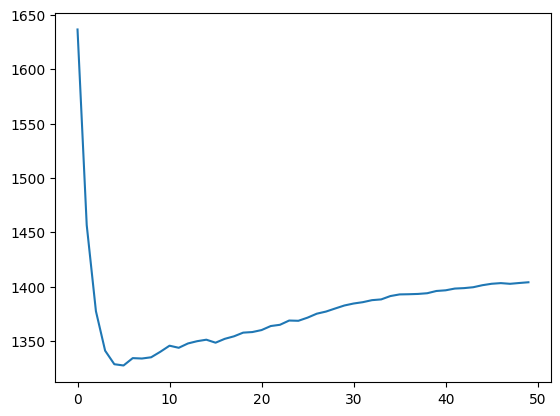

In [21]:
plt.plot(rmse_val)
print(f"Best K Value: {k_list[rmse_val.index(min(rmse_val))]}")